In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [171]:
import pandas as pd
import numpy as np

In [172]:
df = pd.read_excel('../input/train/Train.xlsx')  
df = df.set_index('NO')
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,CLASS
NO,,,,,,,,,,,,,,,,,,,,,
11,1,5,2,5,1,3,1,1,1,2,...,4,3,1,4,1,2,2,3,4,1
12,2,5,1,5,1,5,1,1,1,2,...,5,3,1,5,1,2,1,3,1,1
13,2,4,2,5,2,5,2,2,2,2,...,4,3,2,3,2,3,2,2,4,1
14,2,5,1,5,2,5,2,1,2,2,...,3,2,2,4,2,2,4,3,4,1
15,1,4,1,5,1,3,1,1,1,1,...,4,2,2,3,1,3,1,3,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,3,4,3,5,4,5,2,2,2,2,...,5,1,3,4,1,3,4,4,4,3
298,3,4,3,5,2,3,3,1,2,3,...,2,3,4,3,3,3,4,3,3,3
299,2,4,3,3,2,4,2,1,1,3,...,5,4,2,4,2,3,3,3,4,3


In [173]:
df.isnull().any()

Q1       False
Q2       False
Q3       False
Q4       False
Q5       False
         ...  
Q74      False
Q75      False
Q76      False
Q77      False
CLASS    False
Length: 78, dtype: bool

In [174]:
df_clean = df.drop(['Q31'],axis = 1)
df_clean.isnull().sum(axis=0)

Q1       0
Q2       0
Q3       0
Q4       0
Q5       0
        ..
Q74      0
Q75      0
Q76      0
Q77      0
CLASS    0
Length: 77, dtype: int64

In [175]:
np.isnan(df_clean).any()

Q1       False
Q2       False
Q3       False
Q4       False
Q5       False
         ...  
Q74      False
Q75      False
Q76      False
Q77      False
CLASS    False
Length: 77, dtype: bool

In [176]:
df_clean['CLASS'].unique()

array([1, 2, 3])

In [177]:
pel_class = np.unique(df_clean['CLASS'])
pel_class

array([1, 2, 3])

In [178]:
y = df_clean['CLASS'].values
X = df_clean.drop(['CLASS'],axis = 1).values

In [179]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_resample(X, y)

In [180]:
y = np.array(y)
X = np.array(X)

In [181]:
np.isnan(y)
np.isnan(X)


array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [183]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)


In [184]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
params = {
    'C' : [1,2,4,8,16,32], # High C = Overfitting
    'gamma' : [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32], # High gamma = Overfitting
}
clf = GridSearchCV(SVC(),params, cv=10)
clf.fit(X_train_norm, y_train)
print("Best params : " + str(clf.best_params_))
print("10CV accuracy : "+str(clf.best_score_*100))

Best params : {'C': 4, 'gamma': 0.25}
10CV accuracy : 92.5378787878788


In [185]:
df_test = pd.read_excel('../input/testdom/Test.xlsx') 
df_test = df_test.drop(['Q31'],axis = 1)
df_test

,NO,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,CLASS
0,1,3,4,2,5,2,5,1,1,1,...,5,1,1,4,1,5,1,3,5,1
1,2,1,5,1,4,1,5,2,1,1,...,4,3,1,3,1,2,2,1,5,1
2,3,1,4,2,3,1,4,2,1,1,...,3,1,1,3,1,3,1,2,4,1
3,4,2,5,1,5,2,5,2,1,1,...,4,2,1,4,1,4,2,2,4,1
4,5,1,4,1,5,1,5,1,1,2,...,4,2,1,5,1,3,2,2,4,1
5,6,1,5,1,4,1,4,2,2,2,...,4,2,2,4,1,2,1,1,4,1
6,7,2,4,1,4,2,4,4,2,4,...,5,4,2,4,1,2,1,4,5,1
7,8,1,4,1,5,1,3,3,1,1,...,3,4,1,3,1,3,1,1,3,1
8,9,2,3,1,4,3,4,2,1,2,...,4,3,2,3,1,3,3,3,3,1
9,10,1,4,1,3,1,2,1,1,1,...,5,2,2,3,1,3,3,2,3,1


In [186]:
yt = df_test['CLASS'].values
Xt = df_test.drop(['CLASS'],axis = 1).values

In [187]:
X_test_norm = scaler.transform(X_test)

In [188]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_predict = clf.predict(X_test_norm)
target_names = ['negative', 'positive']
sum(y_test == y_predict)/len(y_test)

0.8641975308641975

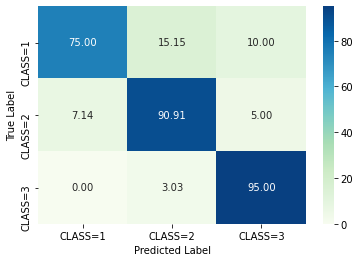

In [189]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
target_names = ['CLASS=1', 'CLASS=2','CLASS=3']
C = confusion_matrix(y_test,y_predict) 
C = C / C.astype(np.float).sum(axis=1)*100
sns.heatmap(C, annot=True, fmt=".2f",cmap="GnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [193]:
X_test_norm.shape

(30, 77)